### Importing Libraries and Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("linkedin_canada.csv")
df.head()

,applicationsCount,companyId,companyName,contractType,description,experienceLevel,location,postedTime,publishedAt,salary,sector,title,workType
0,Over 200 applicants,11000395.0,Embarq,Full-time,About Embarq\n\nWe help VC-backed US startups ...,Mid-Senior level,"Quebec, Canada",2 weeks ago,2024-01-05,NaN,IT Services and IT Consulting and Software Dev...,Machine Learning Engineer,Engineering and Information Technology
1,Over 200 applicants,912833.0,Thumbtack,Full-time,A home is the biggest investment most people m...,Not Applicable,"Ontario, Canada",2 weeks ago,2024-01-05,NaN,"Technology, Information and Internet","Data Scientist, Business Analytics",Engineering and Information Technology
2,Over 200 applicants,10064814.0,Clarifai,Full-time,"About The Company\n\nClarifai is a leading, fu...",Mid-Senior level,"Montreal, Quebec, Canada",4 months ago,2023-09-15,NaN,"Technology, Information and Internet",Data Scientist,Engineering and Information Technology
3,Over 200 applicants,6637598.0,Drop,Full-time,"As a member of the Data Science team, you are ...",Not Applicable,"Toronto, Ontario, Canada",2 months ago,2023-11-15,NaN,"Transportation, Logistics, Supply Chain and St...","Data Science, Investment Research",Engineering and Information Technology
4,Over 200 applicants,2681218.0,Logikk,Full-time,Data Scientist - Computer Vision Tech Company ...,Mid-Senior level,"Montreal, Quebec, Canada",2 weeks ago,2024-01-05,NaN,IT Services and IT Consulting,Data Scientist,Engineering


In [3]:
df.columns

Index(['applicationsCount', 'companyId', 'companyName', 'contractType',
       'description', 'experienceLevel', 'location', 'postedTime',
       'publishedAt', 'salary', 'sector', 'title', 'workType'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   applicationsCount  275 non-null    object 
 1   companyId          274 non-null    float64
 2   companyName        274 non-null    object 
 3   contractType       264 non-null    object 
 4   description        275 non-null    object 
 5   experienceLevel    275 non-null    object 
 6   location           275 non-null    object 
 7   postedTime         275 non-null    object 
 8   publishedAt        270 non-null    object 
 9   salary             13 non-null     object 
 10  sector             264 non-null    object 
 11  title              275 non-null    object 
 12  workType           264 non-null    object 
dtypes: float64(1), object(12)
memory usage: 28.1+ KB


In [5]:
df.isna().sum()

applicationsCount      0
companyId              1
companyName            1
contractType          11
description            0
experienceLevel        0
location               0
postedTime             0
publishedAt            5
salary               262
sector                11
title                  0
workType              11
dtype: int64

### Distribution of job titles in Canada

In [6]:
df.head()

,applicationsCount,companyId,companyName,contractType,description,experienceLevel,location,postedTime,publishedAt,salary,sector,title,workType
0,Over 200 applicants,11000395.0,Embarq,Full-time,About Embarq\n\nWe help VC-backed US startups ...,Mid-Senior level,"Quebec, Canada",2 weeks ago,2024-01-05,NaN,IT Services and IT Consulting and Software Dev...,Machine Learning Engineer,Engineering and Information Technology
1,Over 200 applicants,912833.0,Thumbtack,Full-time,A home is the biggest investment most people m...,Not Applicable,"Ontario, Canada",2 weeks ago,2024-01-05,NaN,"Technology, Information and Internet","Data Scientist, Business Analytics",Engineering and Information Technology
2,Over 200 applicants,10064814.0,Clarifai,Full-time,"About The Company\n\nClarifai is a leading, fu...",Mid-Senior level,"Montreal, Quebec, Canada",4 months ago,2023-09-15,NaN,"Technology, Information and Internet",Data Scientist,Engineering and Information Technology
3,Over 200 applicants,6637598.0,Drop,Full-time,"As a member of the Data Science team, you are ...",Not Applicable,"Toronto, Ontario, Canada",2 months ago,2023-11-15,NaN,"Transportation, Logistics, Supply Chain and St...","Data Science, Investment Research",Engineering and Information Technology
4,Over 200 applicants,2681218.0,Logikk,Full-time,Data Scientist - Computer Vision Tech Company ...,Mid-Senior level,"Montreal, Quebec, Canada",2 weeks ago,2024-01-05,NaN,IT Services and IT Consulting,Data Scientist,Engineering


In [52]:
title= df["title"].value_counts()
job_title=title.head(20)
job_title=pd.DataFrame(job_title)
job_title.rename(columns={"": "Title","":"Counts"}, inplace=True)


In [53]:
job_title

,count
title,
"Machine Learning Engineer I, ML (Anywhere ML)",15
"Machine Learning Engineer II, ML (Credit Decisioning)",8
Python Engineer,7
Senior Machine Learning Engineer,6
"Senior Software Developer, Machine Learning (12 months Term)",5
Machine Learning Engineer,5
Data Scientist,5
Software Engineer - App Stores Backend (Remote),4
Software Developer,4


<Axes: xlabel='count', ylabel='title'>

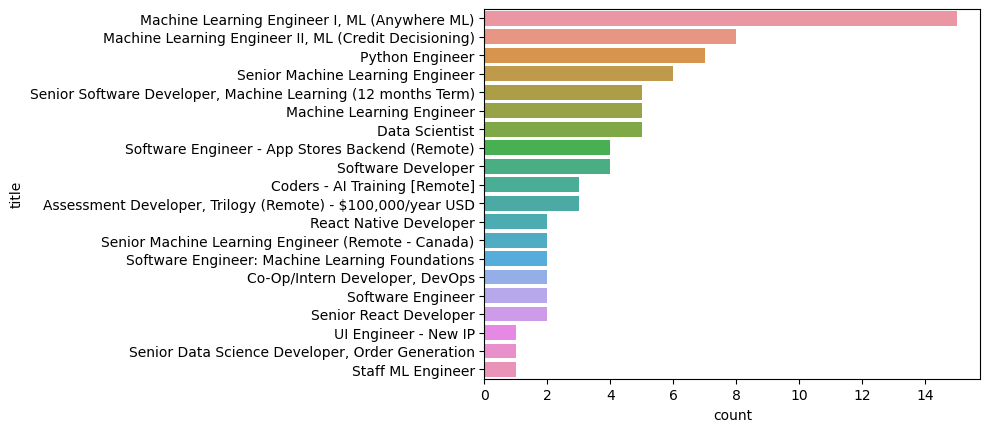

In [110]:
sns.barplot(data=job_title,y=job_title.index,x="count")

### Distribution of jobs by contract type

In [29]:
df.head()

,applicationsCount,companyId,companyName,contractType,description,experienceLevel,location,postedTime,publishedAt,salary,sector,title,workType
0,Over 200 applicants,11000395.0,Embarq,Full-time,About Embarq\n\nWe help VC-backed US startups ...,Mid-Senior level,"Quebec, Canada",2 weeks ago,2024-01-05,NaN,IT Services and IT Consulting and Software Dev...,Machine Learning Engineer,Engineering and Information Technology
1,Over 200 applicants,912833.0,Thumbtack,Full-time,A home is the biggest investment most people m...,Not Applicable,"Ontario, Canada",2 weeks ago,2024-01-05,NaN,"Technology, Information and Internet","Data Scientist, Business Analytics",Engineering and Information Technology
2,Over 200 applicants,10064814.0,Clarifai,Full-time,"About The Company\n\nClarifai is a leading, fu...",Mid-Senior level,"Montreal, Quebec, Canada",4 months ago,2023-09-15,NaN,"Technology, Information and Internet",Data Scientist,Engineering and Information Technology
3,Over 200 applicants,6637598.0,Drop,Full-time,"As a member of the Data Science team, you are ...",Not Applicable,"Toronto, Ontario, Canada",2 months ago,2023-11-15,NaN,"Transportation, Logistics, Supply Chain and St...","Data Science, Investment Research",Engineering and Information Technology
4,Over 200 applicants,2681218.0,Logikk,Full-time,Data Scientist - Computer Vision Tech Company ...,Mid-Senior level,"Montreal, Quebec, Canada",2 weeks ago,2024-01-05,NaN,IT Services and IT Consulting,Data Scientist,Engineering


In [38]:
df['job_count'] = df['title'].map(df['title'].value_counts())
df.head()

,applicationsCount,companyId,companyName,contractType,description,experienceLevel,location,postedTime,publishedAt,salary,sector,title,workType,job_count
0,Over 200 applicants,11000395.0,Embarq,Full-time,About Embarq\n\nWe help VC-backed US startups ...,Mid-Senior level,"Quebec, Canada",2 weeks ago,2024-01-05,NaN,IT Services and IT Consulting and Software Dev...,Machine Learning Engineer,Engineering and Information Technology,5
1,Over 200 applicants,912833.0,Thumbtack,Full-time,A home is the biggest investment most people m...,Not Applicable,"Ontario, Canada",2 weeks ago,2024-01-05,NaN,"Technology, Information and Internet","Data Scientist, Business Analytics",Engineering and Information Technology,1
2,Over 200 applicants,10064814.0,Clarifai,Full-time,"About The Company\n\nClarifai is a leading, fu...",Mid-Senior level,"Montreal, Quebec, Canada",4 months ago,2023-09-15,NaN,"Technology, Information and Internet",Data Scientist,Engineering and Information Technology,5
3,Over 200 applicants,6637598.0,Drop,Full-time,"As a member of the Data Science team, you are ...",Not Applicable,"Toronto, Ontario, Canada",2 months ago,2023-11-15,NaN,"Transportation, Logistics, Supply Chain and St...","Data Science, Investment Research",Engineering and Information Technology,1
4,Over 200 applicants,2681218.0,Logikk,Full-time,Data Scientist - Computer Vision Tech Company ...,Mid-Senior level,"Montreal, Quebec, Canada",2 weeks ago,2024-01-05,NaN,IT Services and IT Consulting,Data Scientist,Engineering,5


In [40]:
filtered= df[df["job_count"]>=3]
filtered.head()

,applicationsCount,companyId,companyName,contractType,description,experienceLevel,location,postedTime,publishedAt,salary,sector,title,workType,job_count
0,Over 200 applicants,11000395.0,Embarq,Full-time,About Embarq\n\nWe help VC-backed US startups ...,Mid-Senior level,"Quebec, Canada",2 weeks ago,2024-01-05,NaN,IT Services and IT Consulting and Software Dev...,Machine Learning Engineer,Engineering and Information Technology,5
2,Over 200 applicants,10064814.0,Clarifai,Full-time,"About The Company\n\nClarifai is a leading, fu...",Mid-Senior level,"Montreal, Quebec, Canada",4 months ago,2023-09-15,NaN,"Technology, Information and Internet",Data Scientist,Engineering and Information Technology,5
4,Over 200 applicants,2681218.0,Logikk,Full-time,Data Scientist - Computer Vision Tech Company ...,Mid-Senior level,"Montreal, Quebec, Canada",2 weeks ago,2024-01-05,NaN,IT Services and IT Consulting,Data Scientist,Engineering,5
8,Over 200 applicants,27207262.0,Altis Technology,Full-time,Position Overview:\n\nRemote position - must b...,Associate,"Moncton, New Brunswick, Canada",1 week ago,2024-01-12,NaN,Software Development and Insurance,Software Developer,Information Technology,4
11,43 applicants,18386613.0,Leap Tools,Full-time,You're driven by the potential of machine visi...,Entry level,Canada,1 month ago,2023-12-16,NaN,Software Development,Machine Learning Engineer,Engineering and Information Technology,5


Text(0.5, 1.0, 'Distribution of Job Titles by Contract Type')

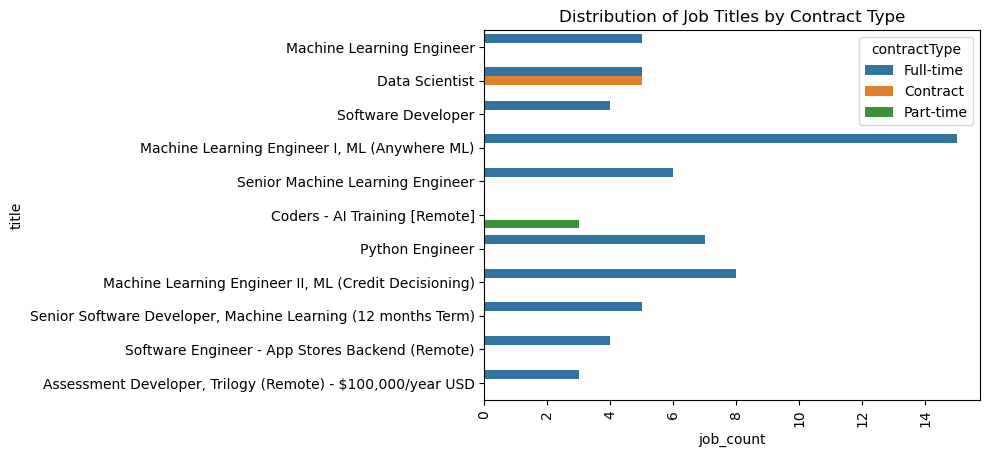

In [109]:
# Most top job titles are contract types
sns.barplot(data=filtered,y="title",x="job_count",hue="contractType")
plt.xticks(rotation=90)
plt.title("Distribution of Job Titles by Contract Type")

In [43]:
df['contract_count'] = df['contractType'].map(df['contractType'].value_counts())
df.head()

,applicationsCount,companyId,companyName,contractType,description,experienceLevel,location,postedTime,publishedAt,salary,sector,title,workType,job_count,contract_count
0,Over 200 applicants,11000395.0,Embarq,Full-time,About Embarq\n\nWe help VC-backed US startups ...,Mid-Senior level,"Quebec, Canada",2 weeks ago,2024-01-05,NaN,IT Services and IT Consulting and Software Dev...,Machine Learning Engineer,Engineering and Information Technology,5,235.0
1,Over 200 applicants,912833.0,Thumbtack,Full-time,A home is the biggest investment most people m...,Not Applicable,"Ontario, Canada",2 weeks ago,2024-01-05,NaN,"Technology, Information and Internet","Data Scientist, Business Analytics",Engineering and Information Technology,1,235.0
2,Over 200 applicants,10064814.0,Clarifai,Full-time,"About The Company\n\nClarifai is a leading, fu...",Mid-Senior level,"Montreal, Quebec, Canada",4 months ago,2023-09-15,NaN,"Technology, Information and Internet",Data Scientist,Engineering and Information Technology,5,235.0
3,Over 200 applicants,6637598.0,Drop,Full-time,"As a member of the Data Science team, you are ...",Not Applicable,"Toronto, Ontario, Canada",2 months ago,2023-11-15,NaN,"Transportation, Logistics, Supply Chain and St...","Data Science, Investment Research",Engineering and Information Technology,1,235.0
4,Over 200 applicants,2681218.0,Logikk,Full-time,Data Scientist - Computer Vision Tech Company ...,Mid-Senior level,"Montreal, Quebec, Canada",2 weeks ago,2024-01-05,NaN,IT Services and IT Consulting,Data Scientist,Engineering,5,235.0


Text(0.5, 1.0, 'Distribution of Contract type')

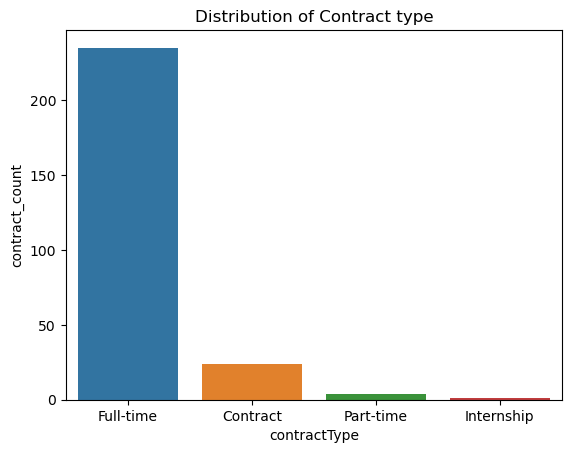

In [59]:
sns.barplot(data=df,x="contractType",y="contract_count")
plt.title("Distribution of Contract type")

### Top companies that post most jobs

In [60]:
df["company_count"]=df["companyName"].map(df["companyName"].value_counts())
df.head()

,applicationsCount,companyId,companyName,contractType,description,experienceLevel,location,postedTime,publishedAt,salary,sector,title,workType,job_count,contract_count,company_count
0,Over 200 applicants,11000395.0,Embarq,Full-time,About Embarq\n\nWe help VC-backed US startups ...,Mid-Senior level,"Quebec, Canada",2 weeks ago,2024-01-05,NaN,IT Services and IT Consulting and Software Dev...,Machine Learning Engineer,Engineering and Information Technology,5,235.0,1.0
1,Over 200 applicants,912833.0,Thumbtack,Full-time,A home is the biggest investment most people m...,Not Applicable,"Ontario, Canada",2 weeks ago,2024-01-05,NaN,"Technology, Information and Internet","Data Scientist, Business Analytics",Engineering and Information Technology,1,235.0,3.0
2,Over 200 applicants,10064814.0,Clarifai,Full-time,"About The Company\n\nClarifai is a leading, fu...",Mid-Senior level,"Montreal, Quebec, Canada",4 months ago,2023-09-15,NaN,"Technology, Information and Internet",Data Scientist,Engineering and Information Technology,5,235.0,1.0
3,Over 200 applicants,6637598.0,Drop,Full-time,"As a member of the Data Science team, you are ...",Not Applicable,"Toronto, Ontario, Canada",2 months ago,2023-11-15,NaN,"Transportation, Logistics, Supply Chain and St...","Data Science, Investment Research",Engineering and Information Technology,1,235.0,1.0
4,Over 200 applicants,2681218.0,Logikk,Full-time,Data Scientist - Computer Vision Tech Company ...,Mid-Senior level,"Montreal, Quebec, Canada",2 weeks ago,2024-01-05,NaN,IT Services and IT Consulting,Data Scientist,Engineering,5,235.0,1.0


In [79]:
filter_company =df[df['company_count']>=5] 
filter_company.head()

,applicationsCount,companyId,companyName,contractType,description,experienceLevel,location,postedTime,publishedAt,salary,sector,title,workType,job_count,contract_count,company_count
13,Over 200 applicants,51628714.0,Zortech Solutions,Contract,Role: SDET Engineers\n\n\n\n\nLocation: Canada...,Mid-Senior level,Canada,4 months ago,2023-08-29,NaN,Human Resources Services,SDET Engineers - Canada,Engineering and Information Technology,1,24.0,17.0
17,Over 200 applicants,51628714.0,Zortech Solutions,Full-time,Role: QA/SDET-Robot and Java\n\nLocation: Remo...,Entry level,Canada,3 months ago,2023-10-16,NaN,Human Resources Services,QA/SDET-Robot and Java-Canada,Engineering and Information Technology,1,235.0,17.0
21,114 applicants,2963249.0,Affirm,Full-time,Affirm is reinventing credit to make it more h...,Mid-Senior level,"Oshawa, Ontario, Canada",2 weeks ago,2024-01-05,NaN,Financial Services,"Machine Learning Engineer I, ML (Anywhere ML)",Engineering and Information Technology,15,235.0,24.0
22,Over 200 applicants,80907130.0,Techedin,Full-time,Position: Python/SQL Developer\n\nJob Type: Fu...,Entry level,Canada,2 months ago,2023-11-08,NaN,IT Services and IT Consulting,Python/SQL Developer (Remote),Information Technology,1,235.0,11.0
25,72 applicants,2963249.0,Affirm,Full-time,Affirm is reinventing credit to make it more h...,Mid-Senior level,"St John’s, Newfoundland and Labrador, Canada",2 weeks ago,2024-01-05,NaN,Financial Services,"Machine Learning Engineer I, ML (Anywhere ML)",Engineering and Information Technology,15,235.0,24.0


c:\Users\Mimi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


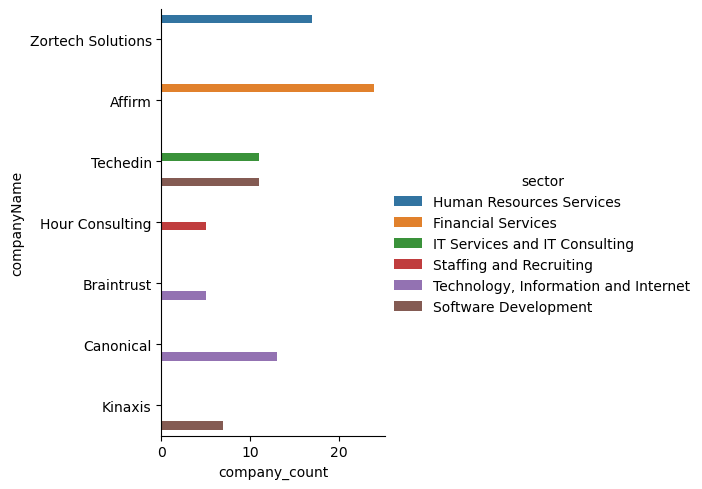

In [108]:
sns.catplot(data=filter_company,y="companyName",x="company_count",hue="sector",kind="bar")

c:\Users\Mimi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distribution on Top Companies According to Frequency of Job Postings')

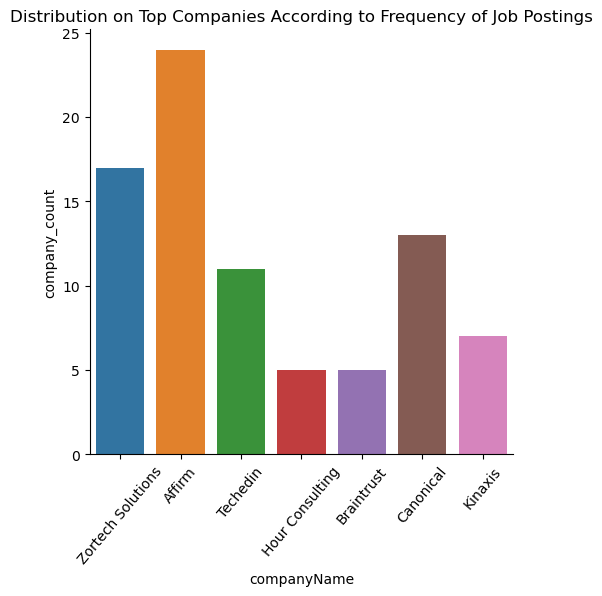

In [87]:
sns.catplot(data=filter_company,x="companyName",y="company_count",kind="bar")
plt.xticks(rotation=50)
plt.title("Distribution on Top Companies According to Frequency of Job Postings")

### Distribution of job posting according to locations

In [89]:
df["location_count"]=df["location"].map(df["location"].value_counts())
df.head()

,applicationsCount,companyId,companyName,contractType,description,experienceLevel,location,postedTime,publishedAt,salary,sector,title,workType,job_count,contract_count,company_count,location_count
0,Over 200 applicants,11000395.0,Embarq,Full-time,About Embarq\n\nWe help VC-backed US startups ...,Mid-Senior level,"Quebec, Canada",2 weeks ago,2024-01-05,NaN,IT Services and IT Consulting and Software Dev...,Machine Learning Engineer,Engineering and Information Technology,5,235.0,1.0,2
1,Over 200 applicants,912833.0,Thumbtack,Full-time,A home is the biggest investment most people m...,Not Applicable,"Ontario, Canada",2 weeks ago,2024-01-05,NaN,"Technology, Information and Internet","Data Scientist, Business Analytics",Engineering and Information Technology,1,235.0,3.0,9
2,Over 200 applicants,10064814.0,Clarifai,Full-time,"About The Company\n\nClarifai is a leading, fu...",Mid-Senior level,"Montreal, Quebec, Canada",4 months ago,2023-09-15,NaN,"Technology, Information and Internet",Data Scientist,Engineering and Information Technology,5,235.0,1.0,9
3,Over 200 applicants,6637598.0,Drop,Full-time,"As a member of the Data Science team, you are ...",Not Applicable,"Toronto, Ontario, Canada",2 months ago,2023-11-15,NaN,"Transportation, Logistics, Supply Chain and St...","Data Science, Investment Research",Engineering and Information Technology,1,235.0,1.0,43
4,Over 200 applicants,2681218.0,Logikk,Full-time,Data Scientist - Computer Vision Tech Company ...,Mid-Senior level,"Montreal, Quebec, Canada",2 weeks ago,2024-01-05,NaN,IT Services and IT Consulting,Data Scientist,Engineering,5,235.0,1.0,9


In [103]:
location_df = df[df["location_count"]>=3]

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140'),
  Text(160.0, 0, '160')])

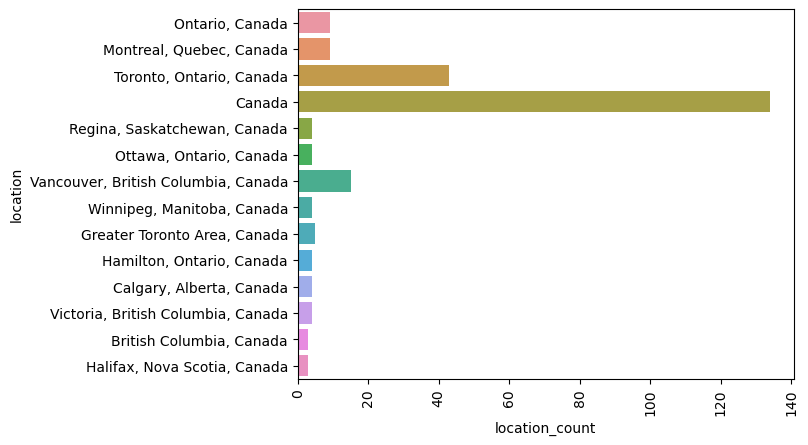

In [106]:
sns.barplot(data=location_df,y="location",x="location_count")
plt.xticks(rotation=90)